<a href="https://colab.research.google.com/github/francisfernande/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [4]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [5]:
data

array([[ 3,  4],
       [ 2,  8],
       [ 6,  9],
       [10, 12]])

In [7]:
df = pd.DataFrame(data, columns=["math","bio"])

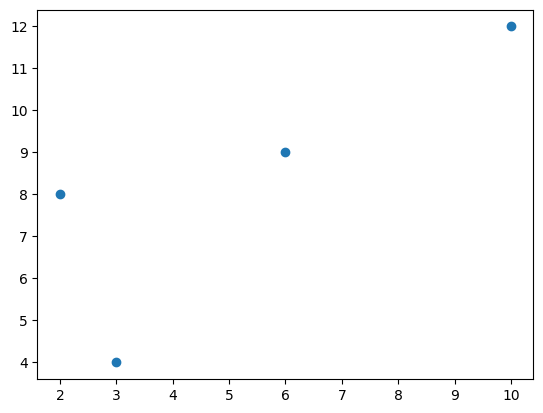

In [11]:
plt.scatter(df["math"],df["bio"])

In [12]:
#1. std
#2. cov mat
#3. eig val
#4. pca

In [14]:
(3+2+6+10)/4

5.25

In [15]:
(4+8+9+12)/4

8.25

In [17]:
meanbycol = np.mean(df,axis=0)

In [18]:
meanbycol

math    5.25
bio     8.25
dtype: float64

In [ ]:
snd = (x-mean/std_dev)

In [19]:
df-meanbycol

,math,bio
0,-2.25,-4.25
1,-3.25,-0.25
2,0.75,0.75
3,4.75,3.75


In [20]:
deviation = df-meanbycol

In [23]:
stdbycol = np.std(deviation,axis=0)

In [33]:
deviation/stdbycol

,math,bio
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [25]:
scaled_data = deviation/stdbycol

In [26]:
#by using scicit learn

In [28]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()

In [32]:
sc.fit_transform(df)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [35]:
sc_df = sc.fit_transform(df)

In [36]:
sc_df.T

array([[-0.7228974 , -1.04418513,  0.2409658 ,  1.52611672],
       [-1.4852969 , -0.08737041,  0.26211122,  1.31055608]])

In [37]:
#2. find out cov mat

In [39]:
np.cov(sc_df.T)
#if T not used -> 16 feature will be there

array([[1.33333333, 1.07605651],
       [1.07605651, 1.33333333]])

In [40]:
cov_mat = np.cov(sc_df.T)

In [41]:
#3. find eigen val and eigen vector

In [43]:
eig(cov_mat)

EigResult(eigenvalues=array([2.40938985, 0.25727682]), eigenvectors=array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


In [44]:
eig_value,eig_vector = eig(cov_mat)

In [45]:
eig_value

array([2.40938985, 0.25727682])

In [48]:
eig_vector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [ ]:
#4. find pca - linear transform my data-> use dot product

In [51]:
eig_vector.T.dot(sc_df.T).T
#1st col is PCA1
#2nd col is PCA2

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA()

In [56]:
pca.fit_transform(sc_df)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [57]:
pd.DataFrame(pca.fit_transform(sc_df),columns=["pc1","pc2"])

,pc1,pc2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [58]:
#cal variance ratio

In [59]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [60]:
0.90352119 + 0.09647881

1.0

In [ ]:
pc1 because it has high var/data